# IDEAL GAS DATA ANALYSIS

## This notebook is made for the purposes of analyzing the data created in the ideal gas simulation main.cpp

### In this notebook our end goal is to see how the change in the particles' coordinate depends on time and animate that dependance using the data generated by the simulation

In [244]:
%pip install progressbar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import time
import pylab as pl
from IPython import display
from progressbar import ProgressBar
import imageio
import glob

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12075 sha256=b763173af3fd3169703516abaeefe24c4fac4383e5c1ae708e7205aa495ce5a8
  Stored in directory: /Users/macuser/Library/Caches/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar
Note: you may need to restart the kernel to use updated packages.


In [159]:
df = pd.read_csv('coordinates.csv', header=None)

In [160]:
df.shape

(1091, 2001)

In [161]:
df.head()

0        1        2        3        4        5        6        7     \
0  56.6689  201.010  39.4188  136.414  237.163  47.3295  182.093  19.8911   
1  57.0552  201.083  39.9121  136.124  237.422  47.9436  181.643  20.6530   
2  57.4415  201.156  40.4054  135.833  237.681  48.5577  181.194  21.4148   
3  57.8277  201.229  40.8987  135.543  237.940  49.1719  180.745  22.1767   
4  58.2140  201.301  41.3919  135.252  238.199  49.7860  180.296  22.9385   

      8        9     ...     1991     1992     1993     1994     1995  \
0  225.699  225.089  ...  244.840  184.278  85.8204  223.437  190.900   
1  225.194  224.659  ...  244.518  183.436  86.2335  223.833  191.217   
2  224.689  224.229  ...  244.196  182.594  86.6466  224.230  191.534   
3  224.185  223.799  ...  243.873  181.752  87.0597  224.627  191.851   
4  223.680  223.369  ...  243.551  180.910  87.4728  225.025  192.168   

      1996     1997     1998     1999  2000  
0  156.857  74.4986  191.053  127.403   NaN  
1  156.837  75.0414  191.591  127.661   NaN  
2  156.817  75.5842  192.129  127.919   NaN  
3  156.796  76.1269  192.667  128.176   NaN  
4  156.774  76.6697  193.204  128.434   NaN  

[5 rows x 2001 columns]

In [162]:
df = df.iloc[:, :-1]

In [163]:
df.head()

0        1        2        3        4        5        6        7     \
0  56.6689  201.010  39.4188  136.414  237.163  47.3295  182.093  19.8911   
1  57.0552  201.083  39.9121  136.124  237.422  47.9436  181.643  20.6530   
2  57.4415  201.156  40.4054  135.833  237.681  48.5577  181.194  21.4148   
3  57.8277  201.229  40.8987  135.543  237.940  49.1719  180.745  22.1767   
4  58.2140  201.301  41.3919  135.252  238.199  49.7860  180.296  22.9385   

      8        9     ...     1990     1991     1992     1993     1994  \
0  225.699  225.089  ...  128.595  244.840  184.278  85.8204  223.437   
1  225.194  224.659  ...  128.310  244.518  183.436  86.2335  223.833   
2  224.689  224.229  ...  128.024  244.196  182.594  86.6466  224.230   
3  224.185  223.799  ...  127.739  243.873  181.752  87.0597  224.627   
4  223.680  223.369  ...  127.453  243.551  180.910  87.4728  225.025   

      1995     1996     1997     1998     1999  
0  190.900  156.857  74.4986  191.053  127.403  
1  191.217  156.837  75.0414  191.591  127.661  
2  191.534  156.817  75.5842  192.129  127.919  
3  191.851  156.796  76.1269  192.667  128.176  
4  192.168  156.774  76.6697  193.204  128.434  

[5 rows x 2000 columns]

In [166]:
starting_positions = pd.Series(df.iloc[0])

<AxesSubplot:>

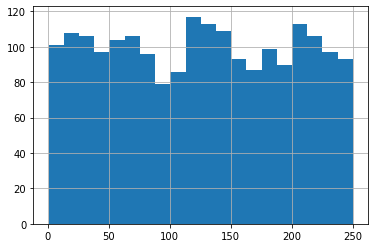

In [167]:
starting_positions.hist(bins=20)

In [171]:
def position_change(tick_number):
    change = pd.Series(df.iloc[tick_number])-starting_positions
    return change

<AxesSubplot:>

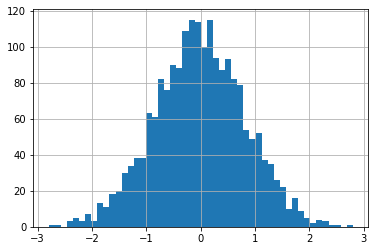

In [176]:
change = position_change(2)
change.hist(bins=50)

100% |########################################################################|


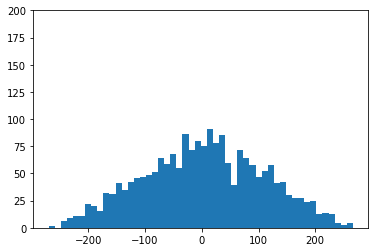

In [246]:
%matplotlib inline
pbar = ProgressBar()
frame_number = 1000

for i in pbar(range(frame_number)):
    plt.cla()
    plt.ylim(0, 200)
    plt.hist(position_change(i), bins=50)
    plt.savefig(f'images//hist_{i:04d}.png')

In [247]:
filenames = glob.glob("images//hist_*.png")
filenames = sorted(filenames)
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

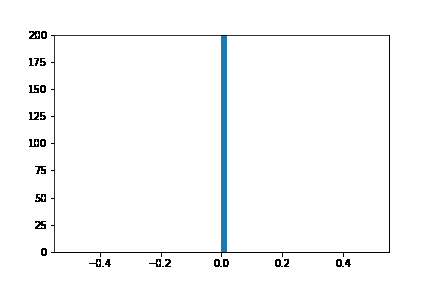

In [248]:
Image(filename="movie.gif")

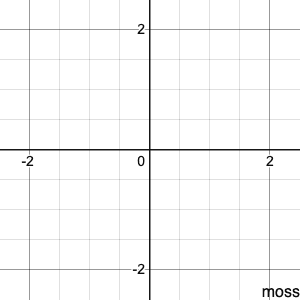

In [249]:
# Theoretical Prediction
Image(filename="x_distribution.gif")